In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv(r"C:\Users\DeLL\Downloads\hotel_bookings.csv\hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
#fixing null values 

df.fillna(0, inplace=True)

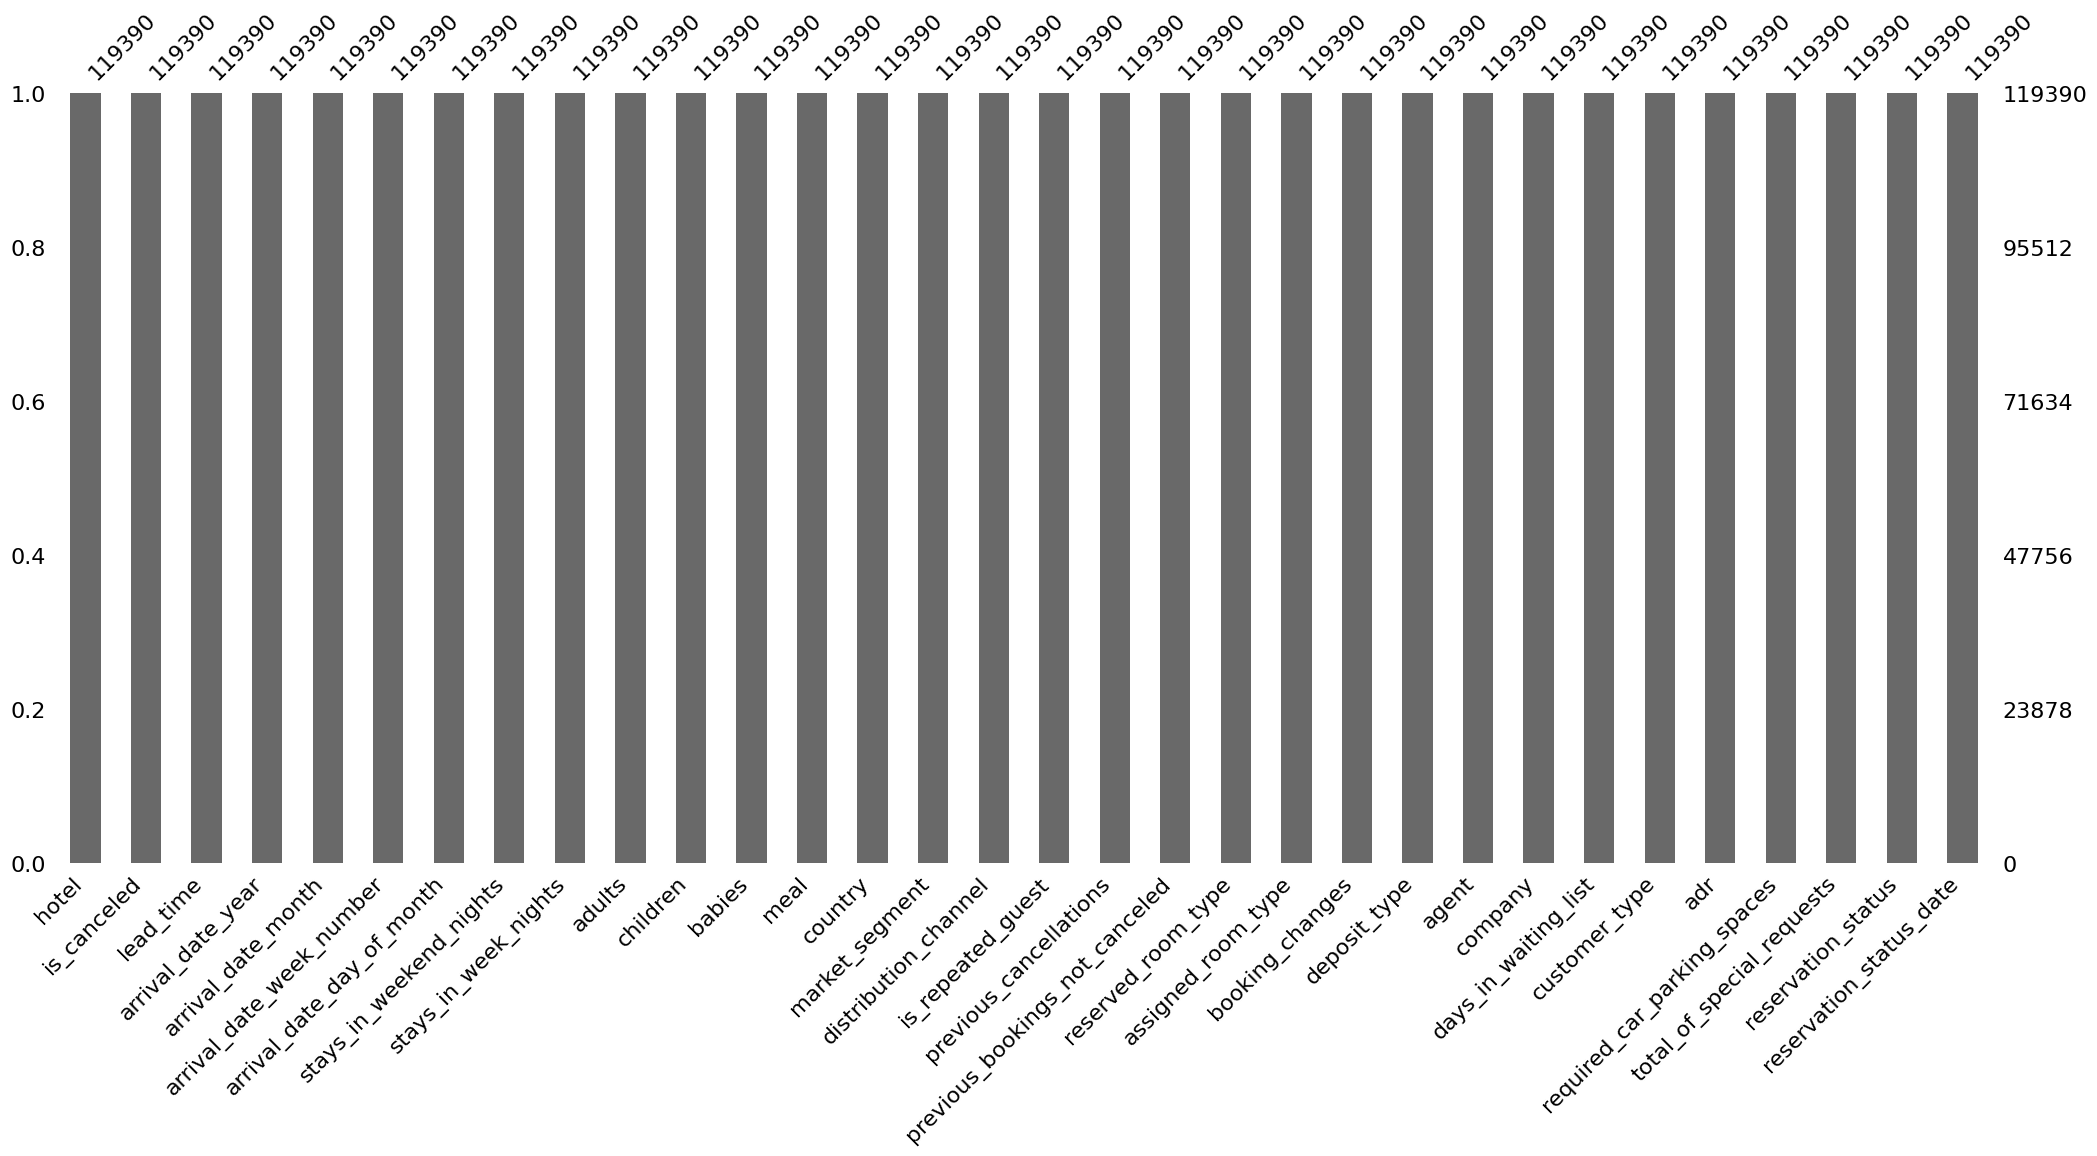

In [10]:
# visualizing null values
import missingno as msno

msno.bar(df)
plt.show()

In [11]:
# adults, children and babies cannot have 0 value at the same time 

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [12]:
df = df[~filter]

In [13]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# ***EXPLORATORY DATA ANALYSIS***

### **CANCELLATION RATE FOR BOTH HOTELS**

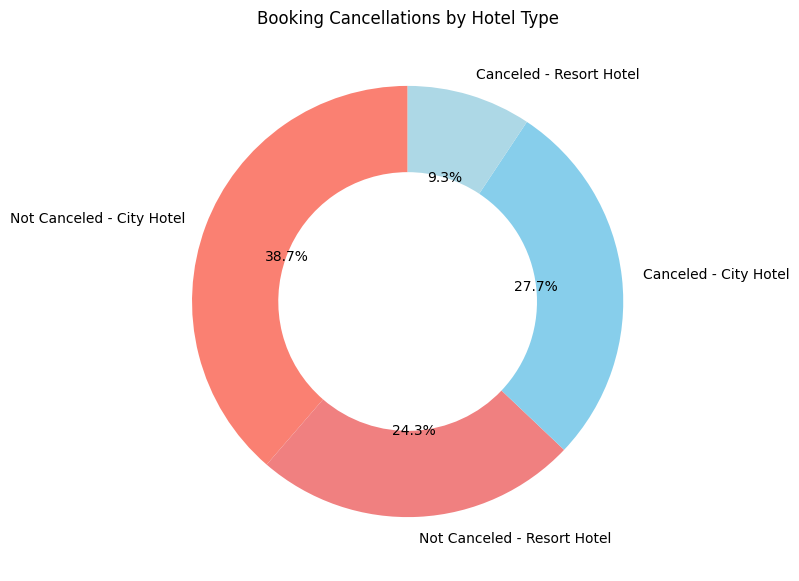

In [14]:
# Group by cancellation and hotel type
grouped = df.groupby(['is_canceled', 'hotel']).size().reset_index(name='count')

# Prepare data for plotting
labels = [f"{'Canceled' if c == 1 else 'Not Canceled'} - {h}" 
          for c, h in zip(grouped['is_canceled'], grouped['hotel'])]
sizes = grouped['count']

# Colors (2 main groups with 2 shades each)
colors = ['salmon', 'lightcoral', 'skyblue', 'lightblue']

# Plot
plt.figure(figsize=(7,7))
plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors,
        wedgeprops=dict(width=0.4))  # makes it look like a donut

plt.title("Booking Cancellations by Hotel Type")
plt.show()



### **EFFECT OF LEAD TIME ON CANCELLATION**

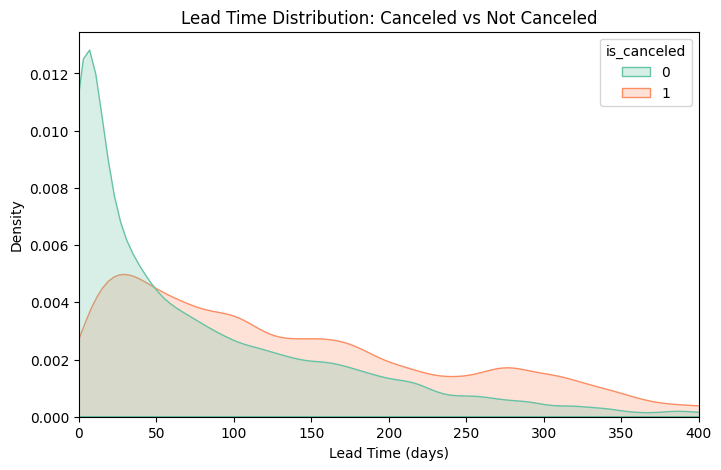

In [15]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="lead_time", hue="is_canceled", fill=True, common_norm=False, palette="Set2")

plt.title("Lead Time Distribution: Canceled vs Not Canceled")
plt.xlabel("Lead Time (days)")
plt.ylabel("Density")
plt.xlim(0, 400)   # optional: zoom in to first 400 days for clarity
plt.show()


### > By looking at the above chart we can analyse that there are less chances of cancellations at lower Lead Time

### **EFFECT OF CUSTOMER TYPE ON CANCELLATION**

C:\Users\DeLL\AppData\Local\Temp\ipykernel_3432\3791837966.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


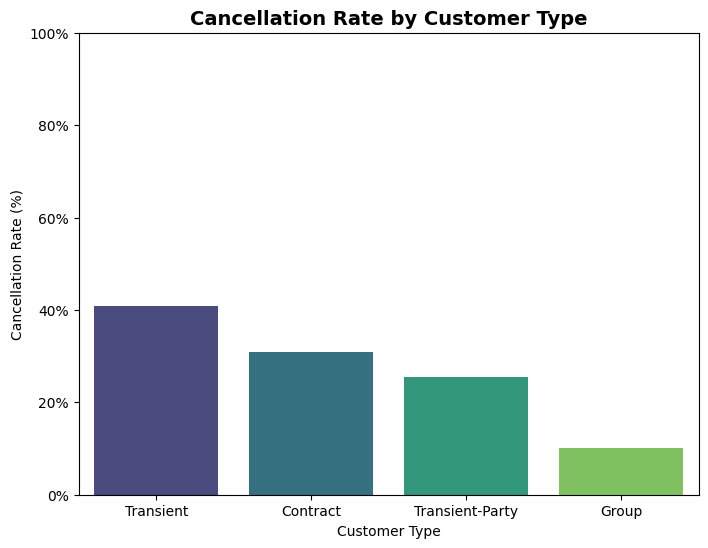

In [16]:
# Compute cancellation rate per customer type
cancellation_rate = (
    df.groupby("customer_type")["is_canceled"]
    .mean()
    .reset_index()
    .sort_values("is_canceled", ascending=False)
)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(
    data=cancellation_rate,
    x="customer_type",
    y="is_canceled",
    palette="viridis"
)

# Formatting
plt.title("Cancellation Rate by Customer Type", fontsize=14, weight="bold")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Customer Type")
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()


### **CANCELATION RATE AS PER DEPOSIT TYPE**

C:\Users\DeLL\AppData\Local\Temp\ipykernel_3432\2116784240.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=deposit_cancel, x="deposit_type", y="is_canceled", palette="pastel")


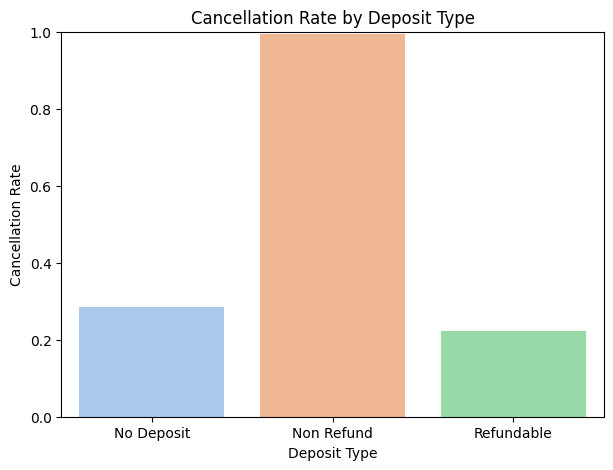

In [17]:
# Group by deposit type and calculate cancellation rate
deposit_cancel = df.groupby("deposit_type")["is_canceled"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=deposit_cancel, x="deposit_type", y="is_canceled", palette="pastel")

plt.title("Cancellation Rate by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Cancellation Rate")
plt.ylim(0,1)  # scale from 0 to 1 (percentage)
plt.show()

### **WHICH COUNTRIES MOST OF THE GUESTS ARE COMING FROM**

In [18]:
guests = df[df["is_canceled"]==0]    # those who haven't canceled their bookings

country_count = guests["country"].value_counts().reset_index()
country_count

,country,count
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,KIR,1
162,ATF,1
163,TJK,1
164,SLE,1


## **WHERE DO MOST DAILY RATES FALL**

C:\Users\DeLL\AppData\Local\Temp\ipykernel_3432\1605256551.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='adr', hue='hotel', shade=True)


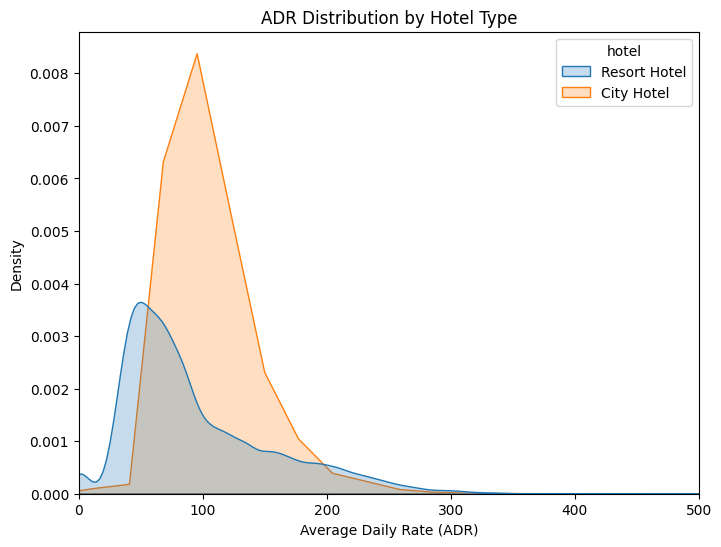

In [19]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='adr', hue='hotel', shade=True)

plt.xlim(0, 500)  # cap outliers for clarity
plt.title('ADR Distribution by Hotel Type')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Density')
plt.show()


### **MONTHLY SEASONALITY OF BOTH RESORT AND CITY HOTELS**

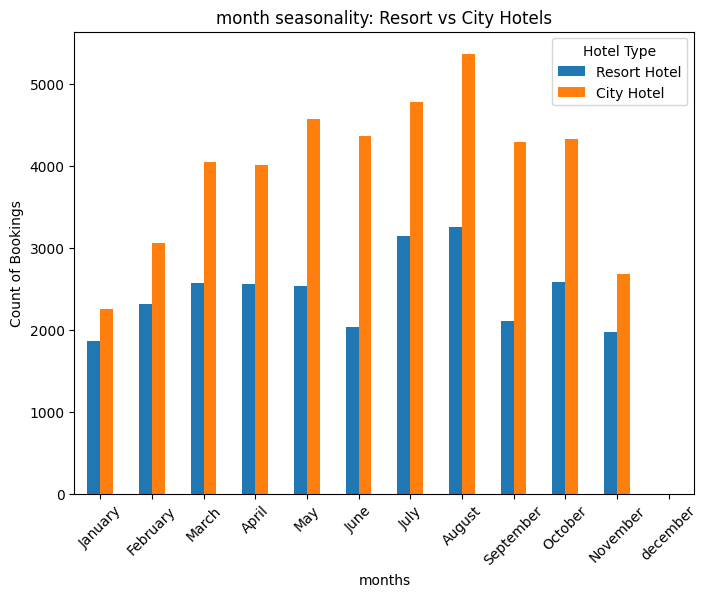

In [20]:
# SEPARATING THE DATA ON THE BASIS OF CITY HOTELS AND RESORT HOTELS 

resort_hotel_data = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
city_hotel_data = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

month_order = ["January","February","March","April","May","June","July","August","September","October","November","december"]

#COUNTING MONTHLY SEASONALITY FOR BOTH RESORT AND CITY HOTELS

resort_seasonality = resort_hotel_data["arrival_date_month"].value_counts()
city_seasonality = city_hotel_data["arrival_date_month"].value_counts()

# Combine into one DataFrame for easier plotting
seasonality_comparison = pd.DataFrame({
    "Resort Hotel": resort_seasonality,
    "City Hotel": city_seasonality
}).fillna(0)

seasonality_comparison = seasonality_comparison.reindex(month_order, fill_value=0)

# Plot as bar chart
seasonality_comparison.plot(kind="bar", figsize=(8,6))

plt.title("month seasonality: Resort vs City Hotels")
plt.xlabel("months")
plt.ylabel("Count of Bookings")
plt.xticks(rotation=45)
plt.legend(title="Hotel Type")
plt.show()

### >By looking at the above chart we can analyse the most busiest month for both resort and city hotels

### **BOOKINGS RATE AS PER MEAL ARRANGEMENTS**

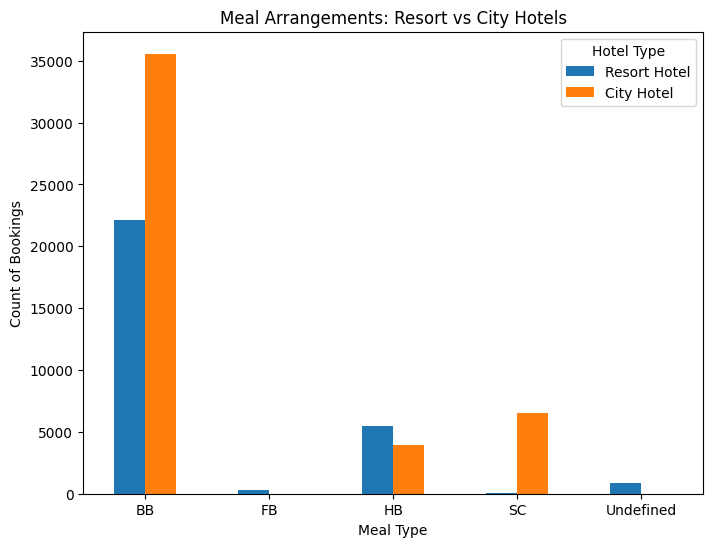

In [21]:
# Count meal categories for both
resort_meals = resort_hotel_data["meal"].value_counts()
city_meals   = city_hotel_data["meal"].value_counts()

# Combine into one DataFrame for easier plotting
meal_comparison = pd.DataFrame({
    "Resort Hotel": resort_meals,
    "City Hotel": city_meals
}).fillna(0)

# Plot as bar chart
meal_comparison.plot(kind="bar", figsize=(8,6))

plt.title("Meal Arrangements: Resort vs City Hotels")
plt.xlabel("Meal Type")
plt.ylabel("Count of Bookings")
plt.xticks(rotation=0)
plt.legend(title="Hotel Type")
plt.show()


### **BOOKINGS RATE AS PER ROOM TYPE**

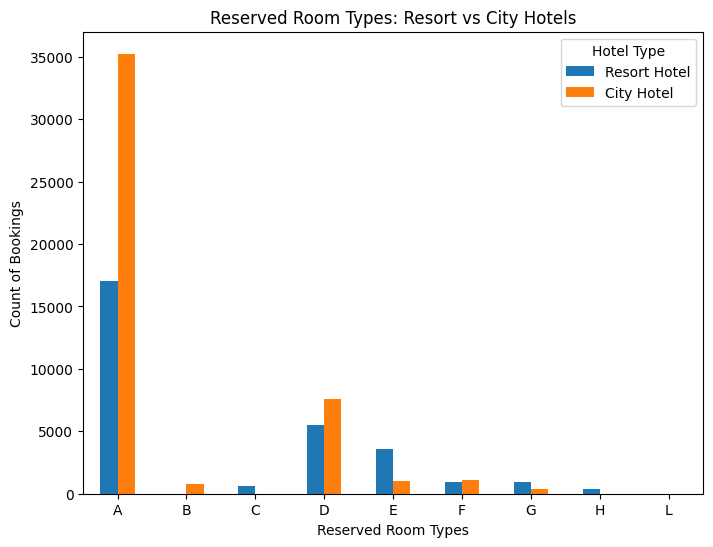

In [22]:
#COUNTING RESERVED ROOM TYPES FOR BOTH HOTELS

resort_rooms = resort_hotel_data["reserved_room_type"].value_counts()
city_rooms = city_hotel_data["reserved_room_type"].value_counts()

# Combine into one DataFrame for easier plotting
room_comparison = pd.DataFrame({
    "Resort Hotel": resort_rooms,
    "City Hotel": city_rooms
}).fillna(0)

# Plot as bar chart
room_comparison.plot(kind="bar", figsize=(8,6))

plt.title("Reserved Room Types: Resort vs City Hotels")
plt.xlabel("Reserved Room Types")
plt.ylabel("Count of Bookings")
plt.xticks(rotation=0)
plt.legend(title="Hotel Type")
plt.show()


### **HOW LONG DO PEOPLE STAY AT EACH HOTEL**

In [23]:
data = df[(df["is_canceled"]==0)]
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']


C:\Users\DeLL\AppData\Local\Temp\ipykernel_3432\58673589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']


In [24]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


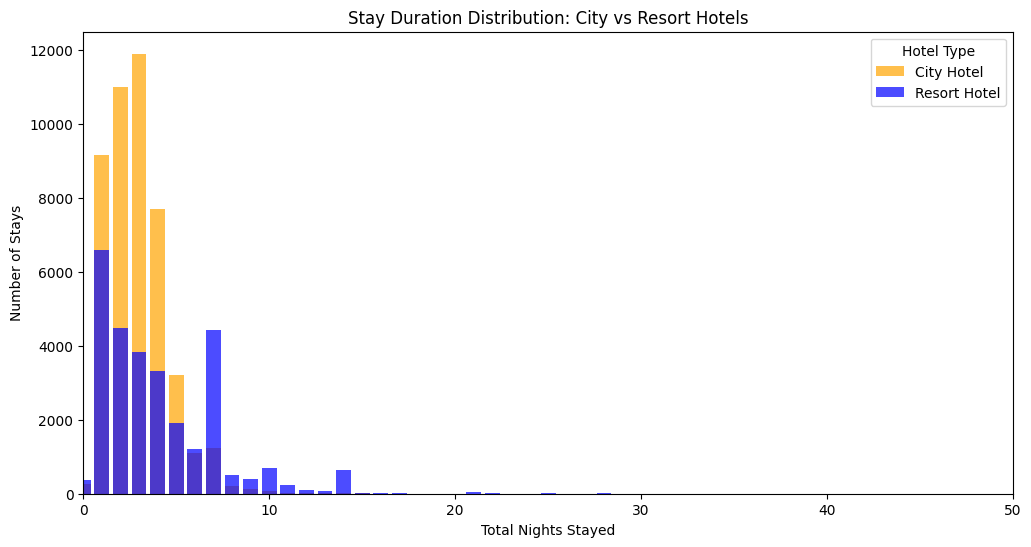

In [25]:
plt.figure(figsize=(12,6))

for hotel_type, color in zip(stay["hotel"].unique(), ["orange", "blue"]):
    subset = stay[stay["hotel"] == hotel_type]
    plt.bar(subset["total_nights"], subset["Number of stays"],
            label=hotel_type, color=color, alpha=0.7)

plt.title("Stay Duration Distribution: City vs Resort Hotels")
plt.xlabel("Total Nights Stayed")
plt.ylabel("Number of Stays")
plt.legend(title="Hotel Type")
plt.xlim(0,50)
plt.show()


## **YEARLY BOOKINGS RATE OF BOTH HOTELS**

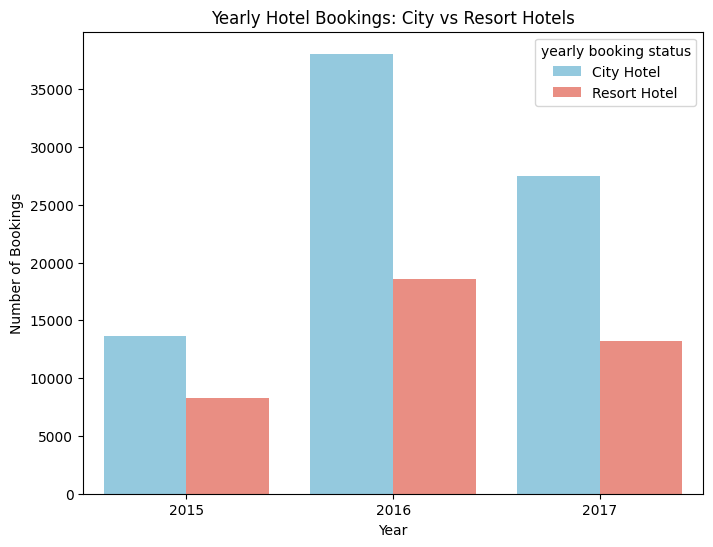

In [26]:
# Group by year and cancellation
yearly_hotel = df.groupby(['arrival_date_year', 'hotel']).size().reset_index(name='bookings')

plt.figure(figsize=(8,6))
sns.barplot(data=yearly_hotel, 
            x='arrival_date_year', 
            y='bookings', 
            hue='hotel', 
            palette=['skyblue','salmon'])

plt.title('Yearly Hotel Bookings: City vs Resort Hotels')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.legend(title="yearly booking status")
plt.show()


# ***DATA PREPROCESSING***

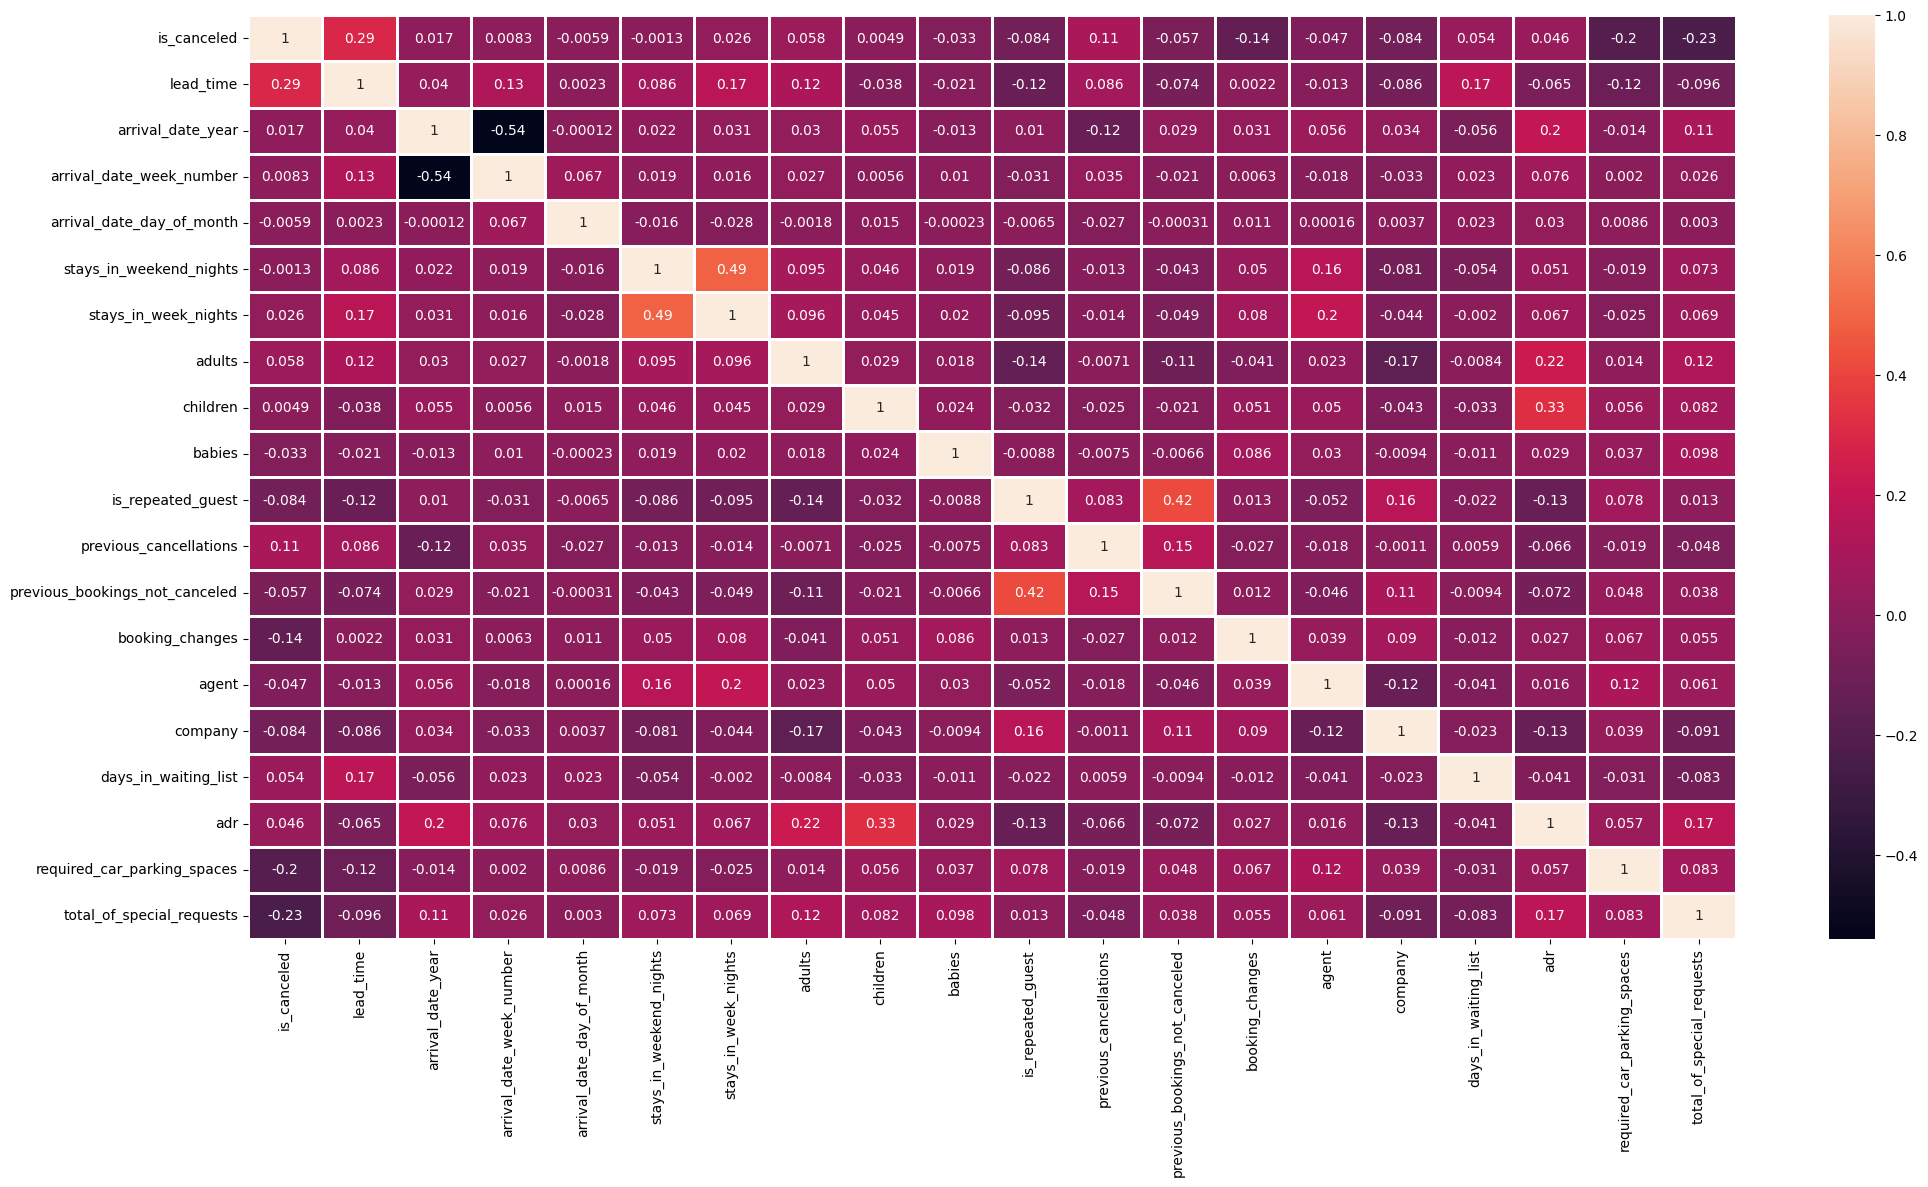

In [27]:
plt.figure(figsize=(24,12))

corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [28]:
correlation = df.select_dtypes(include="number").corr()["is_canceled"].abs().sort_values(ascending=False)
correlation

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [29]:
useless_cols = ["reservation_status","reservation_status_date","company","agent","arrival_date_year","arrival_date_week_number","arrival_date_day_of_month","days_in_waiting_list"]

In [30]:
df.drop(useless_cols, axis=1, inplace=True)

In [31]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,0,0,C,C,3,No Deposit,Transient,0.0,0,0
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,...,0,0,C,C,4,No Deposit,Transient,0.0,0,0
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,0,0,A,C,0,No Deposit,Transient,75.0,0,0
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,0,0,A,A,0,No Deposit,Transient,75.0,0,0
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,0,A,A,0,No Deposit,Transient,98.0,0,1


In [32]:
# converting month names to month numbers

df["arrival_date_month"] = pd.to_datetime(df["arrival_date_month"],format='%B').dt.month

In [33]:
# adding adults, children and babies as Total guests

df["total_guests"] = df["adults"]+df["children"]+df["babies"]

In [34]:
df = df.drop(["adults","children","babies"],axis=1)

In [35]:
# adding weekend nights and week nights as Total stays 

df["total_stay"] = df["stays_in_weekend_nights"]+df["stays_in_week_nights"]

In [36]:
df = df.drop(["stays_in_weekend_nights","stays_in_week_nights"],axis=1)

In [37]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay
0,Resort Hotel,0,342,7,BB,PRT,Direct,Direct,0,0,...,C,C,3,No Deposit,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,7,BB,PRT,Direct,Direct,0,0,...,C,C,4,No Deposit,Transient,0.0,0,0,2.0,0
2,Resort Hotel,0,7,7,BB,GBR,Direct,Direct,0,0,...,A,C,0,No Deposit,Transient,75.0,0,0,1.0,1
3,Resort Hotel,0,13,7,BB,GBR,Corporate,Corporate,0,0,...,A,A,0,No Deposit,Transient,75.0,0,0,1.0,1
4,Resort Hotel,0,14,7,BB,GBR,Online TA,TA/TO,0,0,...,A,A,0,No Deposit,Transient,98.0,0,1,2.0,2


In [38]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                  int32
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
total_guests                      float64
total_stay                          int64
dtype: object

In [39]:
# Encoding categorical columns

cat_cols = ["hotel","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"]

In [40]:
for i in cat_cols:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype(str))

In [41]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay
0,1,0,342,7,0,136,3,1,0,0,...,2,2,3,0,2,0.0,0,0,2.0,0
1,1,0,737,7,0,136,3,1,0,0,...,2,2,4,0,2,0.0,0,0,2.0,0
2,1,0,7,7,0,60,3,1,0,0,...,0,2,0,0,2,75.0,0,0,1.0,1
3,1,0,13,7,0,60,2,0,0,0,...,0,0,0,0,2,75.0,0,0,1.0,1
4,1,0,14,7,0,60,6,3,0,0,...,0,0,0,0,2,98.0,0,1,2.0,2


# ***MODEL BUILDING***

In [42]:
df["is_canceled"].value_counts()

is_canceled
0    75011
1    44199
Name: count, dtype: int64

In [43]:
X = df.drop("is_canceled",axis=1)
y = df[["is_canceled"]]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **STARTING WITH A BASELINE LOGISTIC REGRESSION MODEL**

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logistic = LogisticRegression()

In [47]:
logistic.fit(X_train,y_train)

C:\Users\DeLL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DeLL\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
ytest_log = logistic.predict(X_test)

In [49]:
ytrain_log = logistic.predict(X_train)

In [50]:
print("Accuracy on test data", accuracy_score(y_train, ytrain_log))
print("Accuracy on training data", accuracy_score(y_test, ytest_log))

Accuracy on test data 0.7671650868215754
Accuracy on training data 0.7660431171881553


In [51]:
print(classification_report(y_test, ytest_log))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82     15002
           1       0.73      0.58      0.65      8840

    accuracy                           0.77     23842
   macro avg       0.76      0.73      0.74     23842
weighted avg       0.76      0.77      0.76     23842



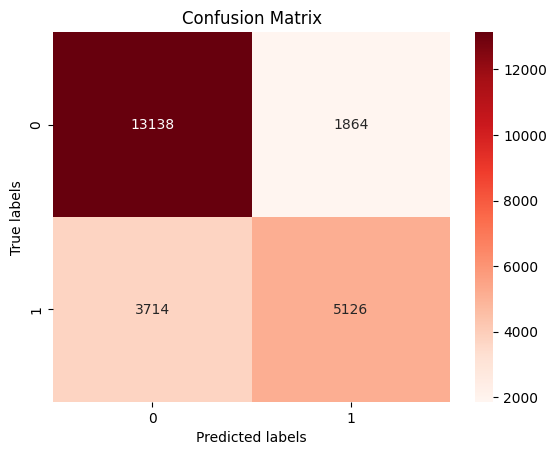

In [52]:
cm = confusion_matrix(y_test, ytest_log)

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [53]:
recall_score(y_test, ytest_log)

0.5798642533936652

In [54]:
precision_score(y_test, ytest_log)

0.7333333333333333

### **RANDOM FOREST MODEL FOR BETTER PERFORMANCE**

In [55]:
rf = RandomForestClassifier(n_estimators=500,
                            random_state=42,
                            max_depth=28,
                            min_samples_split=10,
                            min_samples_leaf=18,
                            max_features="sqrt",
                            class_weight="balanced")

In [57]:
cv_scores = cross_val_score(rf, X_train,y_train, cv=5, scoring="roc_auc")

C:\Users\DeLL\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DeLL\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DeLL\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DeLL\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 

In [62]:
print(cv_scores)
print(cv_scores.mean())
print(cv_scores.std())

[0.93373143 0.93208148 0.93504508 0.93668801 0.9355698 ]
0.9346231615978331
0.001587014140007069


In [63]:
rf.fit(X_train, y_train)

C:\Users\DeLL\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,500
,criterion,'gini'
,max_depth,28
,min_samples_split,10
,min_samples_leaf,18
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
#setting threshold for imbalanced classes 

threshold=0.3
ytest_rf = (rf.predict_proba(X_test)[:,1]>= threshold).astype(int)

In [65]:
ytrain_rf = rf.predict(X_train)

In [69]:
print("Accuracy on training data", accuracy_score(y_train, ytrain_rf))
print("Accuracy on test data", accuracy_score(y_test, ytest_rf))

Accuracy on training data 0.874790286049828
Accuracy on test data 0.7784162402483014


In [71]:
roc_auc_score(y_test, ytest_rf)

0.8152346353819492

In [72]:
print(classification_report(y_test, ytest_rf))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     15002
           1       0.63      0.96      0.76      8840

    accuracy                           0.78     23842
   macro avg       0.80      0.82      0.78     23842
weighted avg       0.84      0.78      0.78     23842



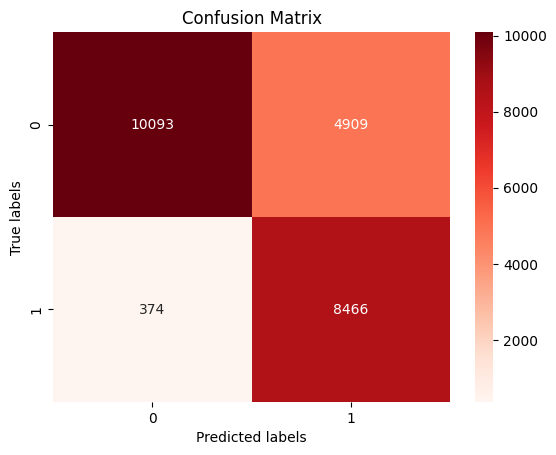

In [73]:
cm = confusion_matrix(y_test, ytest_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [74]:
recall_score(y_test, ytest_rf)

0.9576923076923077

In [75]:
precision_score(y_test, ytest_rf)

0.6329719626168224